In [87]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import random
import copy
import operator

In [88]:
# reading the file
df = pd.read_json("train.json")
# df = df.iloc[0:50]
df_ingredients = df['ingredients'].tolist()

In [89]:
s = []
for index,row in df.iterrows():
  s.append(len(row['ingredients']))

df['length'] = s
# df.sort_values()
df = df.sort_values('length',ascending=False)

In [90]:
df

,id,cuisine,ingredients,length
15289,3885,italian,"[fettucine, fresh marjoram, minced garlic, oli...",65
30350,13430,brazilian,"[marshmallows, fresh corn, cheddar cheese, shr...",59
26103,13049,mexican,"[vanilla ice cream, lime, garlic powder, zucch...",52
10513,49282,mexican,"[condensed cream of chicken soup, pepper, refr...",49
22906,2253,indian,"[white vinegar, sparkling lemonade, coconut su...",49
...,...,...,...,...
32105,12805,japanese,[water],1
21008,39221,italian,[cherry tomatoes],1
34531,10816,greek,[phyllo],1
18136,39186,thai,[jasmine rice],1


In [91]:
# creating the ingredients basket
ingredient_basket = []
for ingredient_list in df_ingredients:
  for ingredient in ingredient_list:
    if ingredient in ingredient_basket:
      pass
    else:
      ingredient_basket.append(ingredient)

# calculate frequency of each ingredient
ingredient_frequency = {}
for index,row in df.iterrows():
  ingredient_list = row['ingredients']
  for ingredient in ingredient_list:
    if ingredient in ingredient_frequency:
      ingredient_frequency[ingredient] = ingredient_frequency[ingredient]+1
    else:
      ingredient_frequency[ingredient] = 1

In [92]:
weighted = []
for ingredient in ingredient_basket:
  weighted.append(ingredient_frequency[ingredient])

In [93]:
# function to plot the recipe size
def plot_recipeSize(recipes):
  size = {}
  for index, row in recipes.iterrows():
    ingredients = row['ingredients']
    length = len(ingredients)
    if length in size:
      size[length] = size[length]+1
    else:
      size[length] = 1
  
  sorted_list = sorted(size.keys())
  y_list = []
  total = 0
  for r in sorted_list:
    y_list.append(size[r])
    total = total+size[r]
  for i in range(len(y_list)):
    y_list[i] = y_list[i]/total
  x_axis = sorted_list
  y_axis = y_list
  plt.plot(x_axis, y_axis)
  plt.xlabel("Recipe size")
  plt.ylabel("Percentage")
  plt.title("Recipe Size Distribution for each cuisine")
  plt.show()

# function to plot the frequency rank distribution
def plot_frequencyRank(recipes):
  d = {}
  for index,row in recipes.iterrows():
    ingredients = row['ingredients']
    for i in ingredients:
      if i in d:
        d[i] = d[i]+1
      else:
        d[i] = 1
  sorted_matrix = sorted(d.items(),key=operator.itemgetter(1),reverse=True)
  sorted_dict = {}

  for i in range(len(sorted_matrix)):
    sorted_dict[i] = sorted_matrix[i][1]

  x_axis = list(sorted_dict.keys())
  y_axis = list(sorted_dict.values())

  plt.loglog(x_axis,y_axis, label = "frequency rank distribution")
  plt.legend()
  plt.xlabel("Rank")
  plt.ylabel("Frequency")
  plt.show()

In [94]:
def create_RandomCuisine_b():
  new_df = {'id':[],'cuisine':[],'ingredients':[]}
  for index,row in df.iterrows():
    recipe = row['ingredients']
    recipe_size = len(recipe)
    new_recipe = []
    indices = []

    # for all the ingredient in the recipe choosing one random ingredient from the ingredient basket
    for i in range(recipe_size):
      while(0<1):
        index = random.randint(0,len(ingredient_basket)-1)
        ingr = ingredient_basket[index]
        if ingredient_frequency[ingr]>0:
          ingredient_basket.remove(ingr)
          indices.append(index)
          new_recipe.append(ingr)
          ingredient_frequency[ingr] = ingredient_frequency[ingr]-1
          break
    
    # appending the new recipe to the cuisine
    new_df['id'].append(row['id'])
    new_df['cuisine'].append(row['cuisine'])
    new_df['ingredients'].append(new_recipe)

    # restoring the ingredient basket
    for i in range(recipe_size):
      if ingredient_frequency[new_recipe[i]]>0:
        ingredient_basket.append(new_recipe[i])
      else:
        del ingredient_frequency[new_recipe[i]]
  # new_df = pd.DataFrame(new_df)
  #         # print(new_df)
  # plot_frequencyRank(new_df)
  # plot_recipeSize(new_df)

In [95]:
def func():
  new_df = {'id':[],'cuisine':[],'ingredients':[]}
  for index,row in df.iterrows():
    size = len(row['ingredients'])
    new_recipe = []
    for i in range(size):
      while 0<1:
        ingredient, frequency = random.choice(list(ingredient_frequency.items()))
        if ingredient in new_recipe:
          continue
        else:
          new_recipe.append(ingredient)
          ingredient_frequency[ingredient] = frequency-1
          if ingredient_frequency[ingredient]==0:
            del ingredient_frequency[ingredient]
          break

    new_df['id'].append(row['id'])
    new_df['cuisine'].append(row['cuisine'])
    new_df['ingredients'].append(new_recipe)
  new_df = pd.Dataframe(new_df)
  plot_frequencyRank(new_df)
  plot_recipeSize(new_df)

In [96]:
ingredient = random.choices(ingredient_basket, weights=weighted, k=1)[0]
print(ingredient)
# print(ingredient_frequency[ingredient])
print(ingredient in ingredient_frequency)

pinto beans
True


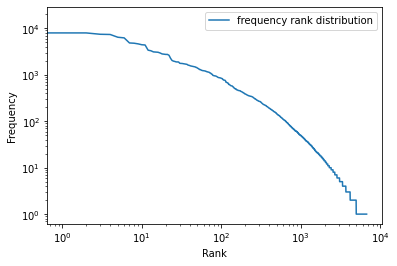

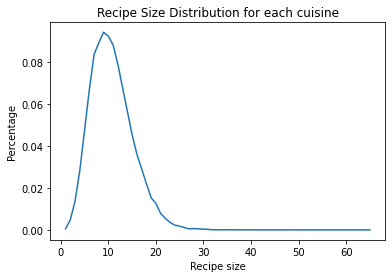

In [97]:
new_df = {'id':[],'cuisine':[],'ingredients':[]}
# i = 0
for index,row in df.iterrows():
  # if len(ingredient_frequency)==0:
  #   break
  size = len(row['ingredients'])
  new_recipe = []
  # ingr = []
  # freq = []
  hell = False

  for i in range(size):
    # if len(ingredient_frequency)==0:
    #   break
    ingredient = random.choices(ingredient_basket, weights=weighted, k=1)[0]
    index = ingredient_basket.index(ingredient)
    frequency = weighted[index]-1
    if frequency==0:
      weighted.pop(index)
      ingredient_basket.pop(index)
    else:
      weighted[index] = weighted[index]-1
    # ingredient, frequency = random.choice(list(ingredient_frequency.items()))
    # ingr.append(ingredient)
    # freq.append(frequency)
    # del ingredient_frequency[ingredient]
    new_recipe.append(ingredient)
  
  # while i<size:
  #   while 0<1:
  #     index = random.randint(0,len(ingredient_basket)-1)
  #     if ingredient_basket[index] in new_recipe:
  #       continue
  #     else:
  #       new_recipe.append(ingredient_basket[index])
  #       i = i+1
  #       break

  # for i in range(len(ingr)):
  #   if freq[i]>0:
  #     ingredient_frequency[ingr[i]]=freq[i]
    # while 0<1:
    #   ingredient, frequency = random.choice(list(ingredient_frequency.items()))
    #   ingr.append(ingredient)
    #   freq.append(frequency)
    #   del ingredient_frequency[ingredient]
    #   if ingredient in new_recipe:
    #     continue
    #   else:
    #     new_recipe.append(ingredient)
    #     ingredient_frequency[ingredient] = frequency-1
    #     if ingredient_frequency[ingredient]==0:
    #       del ingredient_frequency[ingredient]
    #     break
    # print(len(ingredient_frequency))

  new_df['id'].append(row['id'])
  new_df['cuisine'].append(row['cuisine'])
  new_df['ingredients'].append(new_recipe)
new_df = pd.DataFrame(new_df)
plot_frequencyRank(new_df)
plot_recipeSize(new_df)

In [98]:
new_df

,id,cuisine,ingredients
0,3885,italian,"[crushed red pepper, extra-virgin olive oil, l..."
1,13430,brazilian,"[crushed red pepper, pepper, pepper, ground cu..."
2,13049,mexican,"[pimentos, rice vinegar, lemon juice, low salt..."
3,49282,mexican,"[ground black pepper, red bell pepper, sugar, ..."
4,2253,indian,"[butter, pepper, garlic cloves, baking soda, g..."
...,...,...,...
39769,12805,japanese,[butter]
39770,39221,italian,[bacon]
39771,10816,greek,[refrigerated fettuccine]
39772,39186,thai,[fresh mushrooms]


In [99]:
print(len(ingredient_basket))

0


In [100]:
# new_df = {'id':[],'cuisine':[],'ingredients':[]}
# for index,row in df.iterrows():
#   recipe = row['ingredients']
#   recipe_size = len(recipe)
#   new_recipe = []
#   indices = []

#     # for all the ingredient in the recipe choosing one random ingredient from the ingredient basket
#   for i in range(recipe_size):
#     hell = False
#     while(0<1):
#       # print("length = ", len(ingredient_basket))
#       # print(ingredient_frequency)
#       if(len(ingredient_basket)==0):
#         hell = True
#         break
#       index = random.randint(0,len(ingredient_basket)-1)
#       ingr = ingredient_basket[index]
#       if ingredient_frequency[ingr]>0:
#         ingredient_basket.remove(ingr)
#         indices.append(index)
#         new_recipe.append(ingr)
#         ingredient_frequency[ingr] = ingredient_frequency[ingr]-1
#         break
#     if hell:
#       break
    
#     # appending the new recipe to the cuisine
#   new_df['id'].append(row['id'])
#   new_df['cuisine'].append(row['cuisine'])
#   new_df['ingredients'].append(new_recipe)
#   dframe = pd.DataFrame(new_df)
#   print(dframe)

#     # restoring the ingredient basket
#   for i in range(recipe_size):
#     if ingredient_frequency[new_recipe[i]]>0:
#       ingredient_basket.append(new_recipe[i])
#     else:
#       del ingredient_frequency[new_recipe[i]]

# new_df = pd.DataFrame(new_df)
# plot_frequencyRank(new_df)
# plot_recipeSize(new_df)

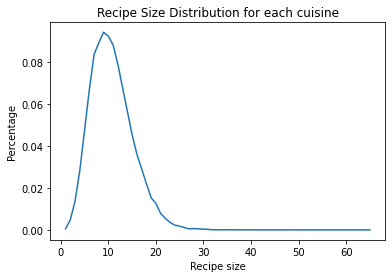

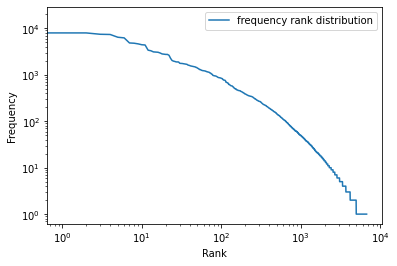

In [101]:
plot_recipeSize(df)
plot_frequencyRank(df)

In [102]:
import pandas as pd

df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]})

for index, row in df.iterrows():
    print(row['c1'], row['c2'])

df['c3'] = [22,2,3]
df = df.sort_values('c3')
df

10 100
11 110
12 120


,c1,c2,c3
1,11,110,2
2,12,120,3
0,10,100,22
